<a href="https://colab.research.google.com/github/Faradayxx/202155202019-Dandy_Fajar_Febrian/blob/main/tes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INSTAL SELURUH LIBRARY PYTHON**

In [1]:
!pip install  pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 33.0 MB/s eta 0:00:00


**IMPORT LIBARRY UNTUK MELAKUKAN ANALISA**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

In [4]:
# Import library
from google.colab import files

# Menggunakan widget upload file
uploaded = files.upload()

Saving Laptop Sales Per Day.xlsx to Laptop Sales Per Day.xlsx


In [5]:
# Ambil nama file yang diunggah
file_name = list(uploaded.keys())[0]

# Baca file XLSX
data = pd.read_excel(file_name)

# Tentukan nama file CSV yang akan disimpan
csv_file_name = file_name.replace('.xlsx', '.csv')

# Simpan sebagai file CSV
data.to_csv(csv_file_name, index=False)

print(f"File {file_name} berhasil diubah menjadi {csv_file_name}")

File Laptop Sales Per Day.xlsx berhasil diubah menjadi Laptop Sales Per Day.csv


In [6]:
df = pd.read_csv("/content/Laptop Sales Per Day.csv")

In [7]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram (GB),Memory,Gpu,OpSys,Weight,Price_euros,Total Sales per Day (euros)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2679.38
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1150.00
3,Apple,,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,7612.35
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3607.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1914.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,2998.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,458.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,764.00


**MELAKUKAN NORMALISASI DATA**

In [8]:
df = df.drop("Product", axis=1)

In [9]:
df = df.join(pd.get_dummies(df.Company))
# The 'Company' column is now removed, so we iterate over new company columns

df = df.drop("Company", axis=1)  # Drop the original 'Company' column if it still exists

In [10]:
for col in df.columns:
    if col.startswith(('Acer','Apple','Asus','Chuwi','Dell','Fujitsu','Google','HP','Huawei','LG','Lenovo','MSI','Mediacom','Microsoft','Razer','Samsung','Toshiba','Vero','Xiaomi')):  # Check if column is a company dummy by passing a tuple of prefixes
        df = df.astype({col: int})  # Convert to integer

In [11]:
df = df.join(pd.get_dummies(df.TypeName))
# The 'Company' column is now removed, so we iterate over new company columns

df = df.drop("TypeName", axis=1)  # Drop the original 'Company' column if it still exists

In [12]:
for col in df.columns:
    if col.startswith(('2 in 1 Convertible','Gaming','Netbook','Notebook','Ultrabook','Workstation')):  # Check if column is a company dummy by passing a tuple of prefixes
        df = df.astype({col: int})  # Convert to integer

In [13]:
df["ScreenResolution"] = df.ScreenResolution.str.split(" ").apply(lambda x: x[-1])
df["Screen Width"] = df.ScreenResolution.str.split("x").apply(lambda x: x[0])
df["Screen Height"] = df.ScreenResolution.str.split("x").apply(lambda x: x[1])

In [14]:
df = df.drop("ScreenResolution", axis=1)

In [15]:
df["CPU Brand"] = df.Cpu.str.split(" ").apply(lambda x: x[0])
df["CPU Frequency"] = df.Cpu.str.split(" ").apply(lambda x: x[-1])

In [16]:
df = df.drop("Cpu", axis=1)

In [17]:
df["CPU Frequency"] = df["CPU Frequency"].str[:-3]

In [18]:
df["Ram (GB)"] = df["Ram (GB)"].astype("int")
df["CPU Frequency"] = df["CPU Frequency"].astype("float")

In [19]:
df["Screen Width"] = df["Screen Width"].astype("int")
df["Screen Height"] = df["Screen Height"].astype("int")

In [20]:
df["Memory Amount"] = df.Memory.str.split(" ").apply(lambda x: x[0])
df["Memory Type"] = df.Memory.str.split(" ").apply(lambda x: x[1])

In [21]:
def turn_memory_into_MB(value):
    if "GB" in value:
        return float(value[:value.find("GB")]) * 1000
    elif "TB" in value:
        return float(value[:value.find("TB")]) * 1000000

In [22]:
df["Memory Amount"] = df["Memory Amount"].apply(turn_memory_into_MB)

In [23]:
df = df.drop("Memory", axis=1)

In [24]:
df["Weight"] = df["Weight"].astype("float")

In [25]:
df["GPU Brand"] = df.Gpu.str.split(" ").apply(lambda x: x[0])

In [26]:
df = df.drop("Gpu", axis=1)

In [27]:
df = df.join(pd.get_dummies(df.OpSys))
df = df.drop("OpSys", axis=1)

In [28]:
for col in df.columns:
    if col.startswith(('Android','Chrome OS','Linux','Mac OS X','No OS','Windows 10','Windows 10 S','Windows 7','macOS')):  # Check if column is a company dummy by passing a tuple of prefixes
        df = df.astype({col: int})  # Convert to integer

In [29]:
cpu_categories = pd.get_dummies(df["CPU Brand"])
cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns]

df = df.join(cpu_categories)
df = df.drop("CPU Brand", axis=1)

In [30]:
for col in df.columns:
    if col.startswith(('AMD_CPU','Intel_CPU','Samsung_CPU')):  # Check if column is a company dummy by passing a tuple of prefixes
        df = df.astype({col: int})  # Convert to integer

In [31]:
gpu_categories = pd.get_dummies(df["GPU Brand"])
gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns]

df = df.join(gpu_categories)
df = df.drop("GPU Brand", axis=1)

In [32]:
for col in df.columns:
    if col.startswith(('AMD_GPU','ARM_GPU','Intel_GPU','Nvidia_GPU')):  # Check if column is a company dummy by passing a tuple of prefixes
        df = df.astype({col: int})  # Convert to integer

In [33]:
memory_categories = pd.get_dummies(df["Memory Type"])
memory_categories.columns = [col + "_Memory" for col in memory_categories.columns]

df = df.join(memory_categories)
df = df.drop("Memory Type", axis=1)

In [34]:
for col in df.columns:
    if col.startswith(('Flash_Memory','HDD_Memory','Hybrid_Memory','SSD_Memory')):  # Check if column is a company dummy by passing a tuple of prefixes
        df = df.astype({col: int})  # Convert to integer

In [36]:
df

,Inches,Ram (GB),Weight,Price_euros,Total Sales per Day (euros),Acer,Apple,Asus,Chuwi,Dell,...,Intel_CPU,Samsung_CPU,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU,Flash_Memory,HDD_Memory,Hybrid_Memory,SSD_Memory
0,13.3,8,1.37,1339.69,2679.38,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,13.3,8,1.34,898.94,898.94,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,0
2,15.6,8,1.86,575.00,1150.00,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,15.4,16,1.83,2537.45,7612.35,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
4,13.3,8,1.37,1803.60,3607.20,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,4,1.80,638.00,1914.00,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1299,13.3,16,1.30,1499.00,2998.00,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1300,14.0,2,1.50,229.00,458.00,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
1301,15.6,6,2.19,764.00,764.00,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0


**MEMBUAT KORELASI ANTAR ATRIBUT**

In [35]:
df.corr()

,Inches,Ram (GB),Weight,Price_euros,Total Sales per Day (euros),Acer,Apple,Asus,Chuwi,Dell,...,Intel_CPU,Samsung_CPU,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU,Flash_Memory,HDD_Memory,Hybrid_Memory,SSD_Memory
Inches,1.000000,0.237993,0.827631,0.068197,0.057162,0.009435,-0.158850,0.112766,-0.017426,0.045288,...,-0.122000,-0.052816,0.207023,-0.052816,-0.592264,0.486561,-0.367908,0.271145,0.026080,-0.082325
Ram (GB),0.237993,1.000000,0.383874,0.743007,0.653941,-0.138432,0.023950,0.088634,-0.035117,0.082241,...,0.107051,-0.023894,-0.093119,-0.023894,-0.319551,0.415464,-0.192327,-0.318614,-0.016994,0.398663
Weight,0.827631,0.383874,1.000000,0.210370,0.164882,0.056444,-0.138191,0.101332,-0.022536,0.088465,...,-0.057386,-0.037026,0.106519,-0.037026,-0.596378,0.565232,-0.259337,0.166644,0.030970,-0.037134
Price_euros,0.068197,0.743007,0.210370,1.000000,0.789777,-0.208349,0.080688,-0.010376,-0.055646,0.048509,...,0.181127,-0.018431,-0.199415,-0.018431,-0.184205,0.348797,-0.210823,-0.426121,-0.039386,0.513609
Total Sales per Day (euros),0.057162,0.653941,0.164882,0.789777,1.000000,-0.148436,0.057738,0.062265,-0.033261,0.048930,...,0.130744,-0.015784,-0.166430,-0.015784,-0.158914,0.296708,-0.161305,-0.346108,-0.040367,0.413858
Acer,0.009435,-0.138432,0.056444,-0.208349,-0.148436,1.000000,-0.037497,-0.108831,-0.014074,-0.159187,...,-0.066566,-0.008119,-0.034859,-0.008119,0.005305,0.020848,0.086359,0.109048,-0.025765,-0.140685
Apple,-0.158850,0.023950,-0.138191,0.080688,0.057738,-0.037497,1.000000,-0.047544,-0.006148,-0.069542,...,0.028849,-0.003547,0.001749,-0.003547,0.078028,-0.085183,0.230044,-0.081359,-0.011256,-0.032982
Asus,0.112766,0.088634,0.101332,-0.010376,0.062265,-0.108831,-0.047544,1.000000,-0.017845,-0.201839,...,-0.036835,-0.010295,-0.073770,-0.010295,-0.106654,0.170742,0.049519,-0.007644,-0.032668,-0.010926
Chuwi,-0.017426,-0.035117,-0.022536,-0.055646,-0.033261,-0.014074,-0.006148,-0.017845,1.000000,-0.026102,...,0.010828,-0.001331,-0.019232,-0.001331,0.043093,-0.031972,0.194383,-0.030537,-0.004225,-0.065032
Dell,0.045288,0.082241,0.088465,0.048509,0.048930,-0.159187,-0.069542,-0.201839,-0.026102,1.000000,...,0.122473,-0.015058,0.190722,-0.015058,-0.075707,-0.060187,-0.118570,0.046568,-0.005856,0.014739


<Axes: >

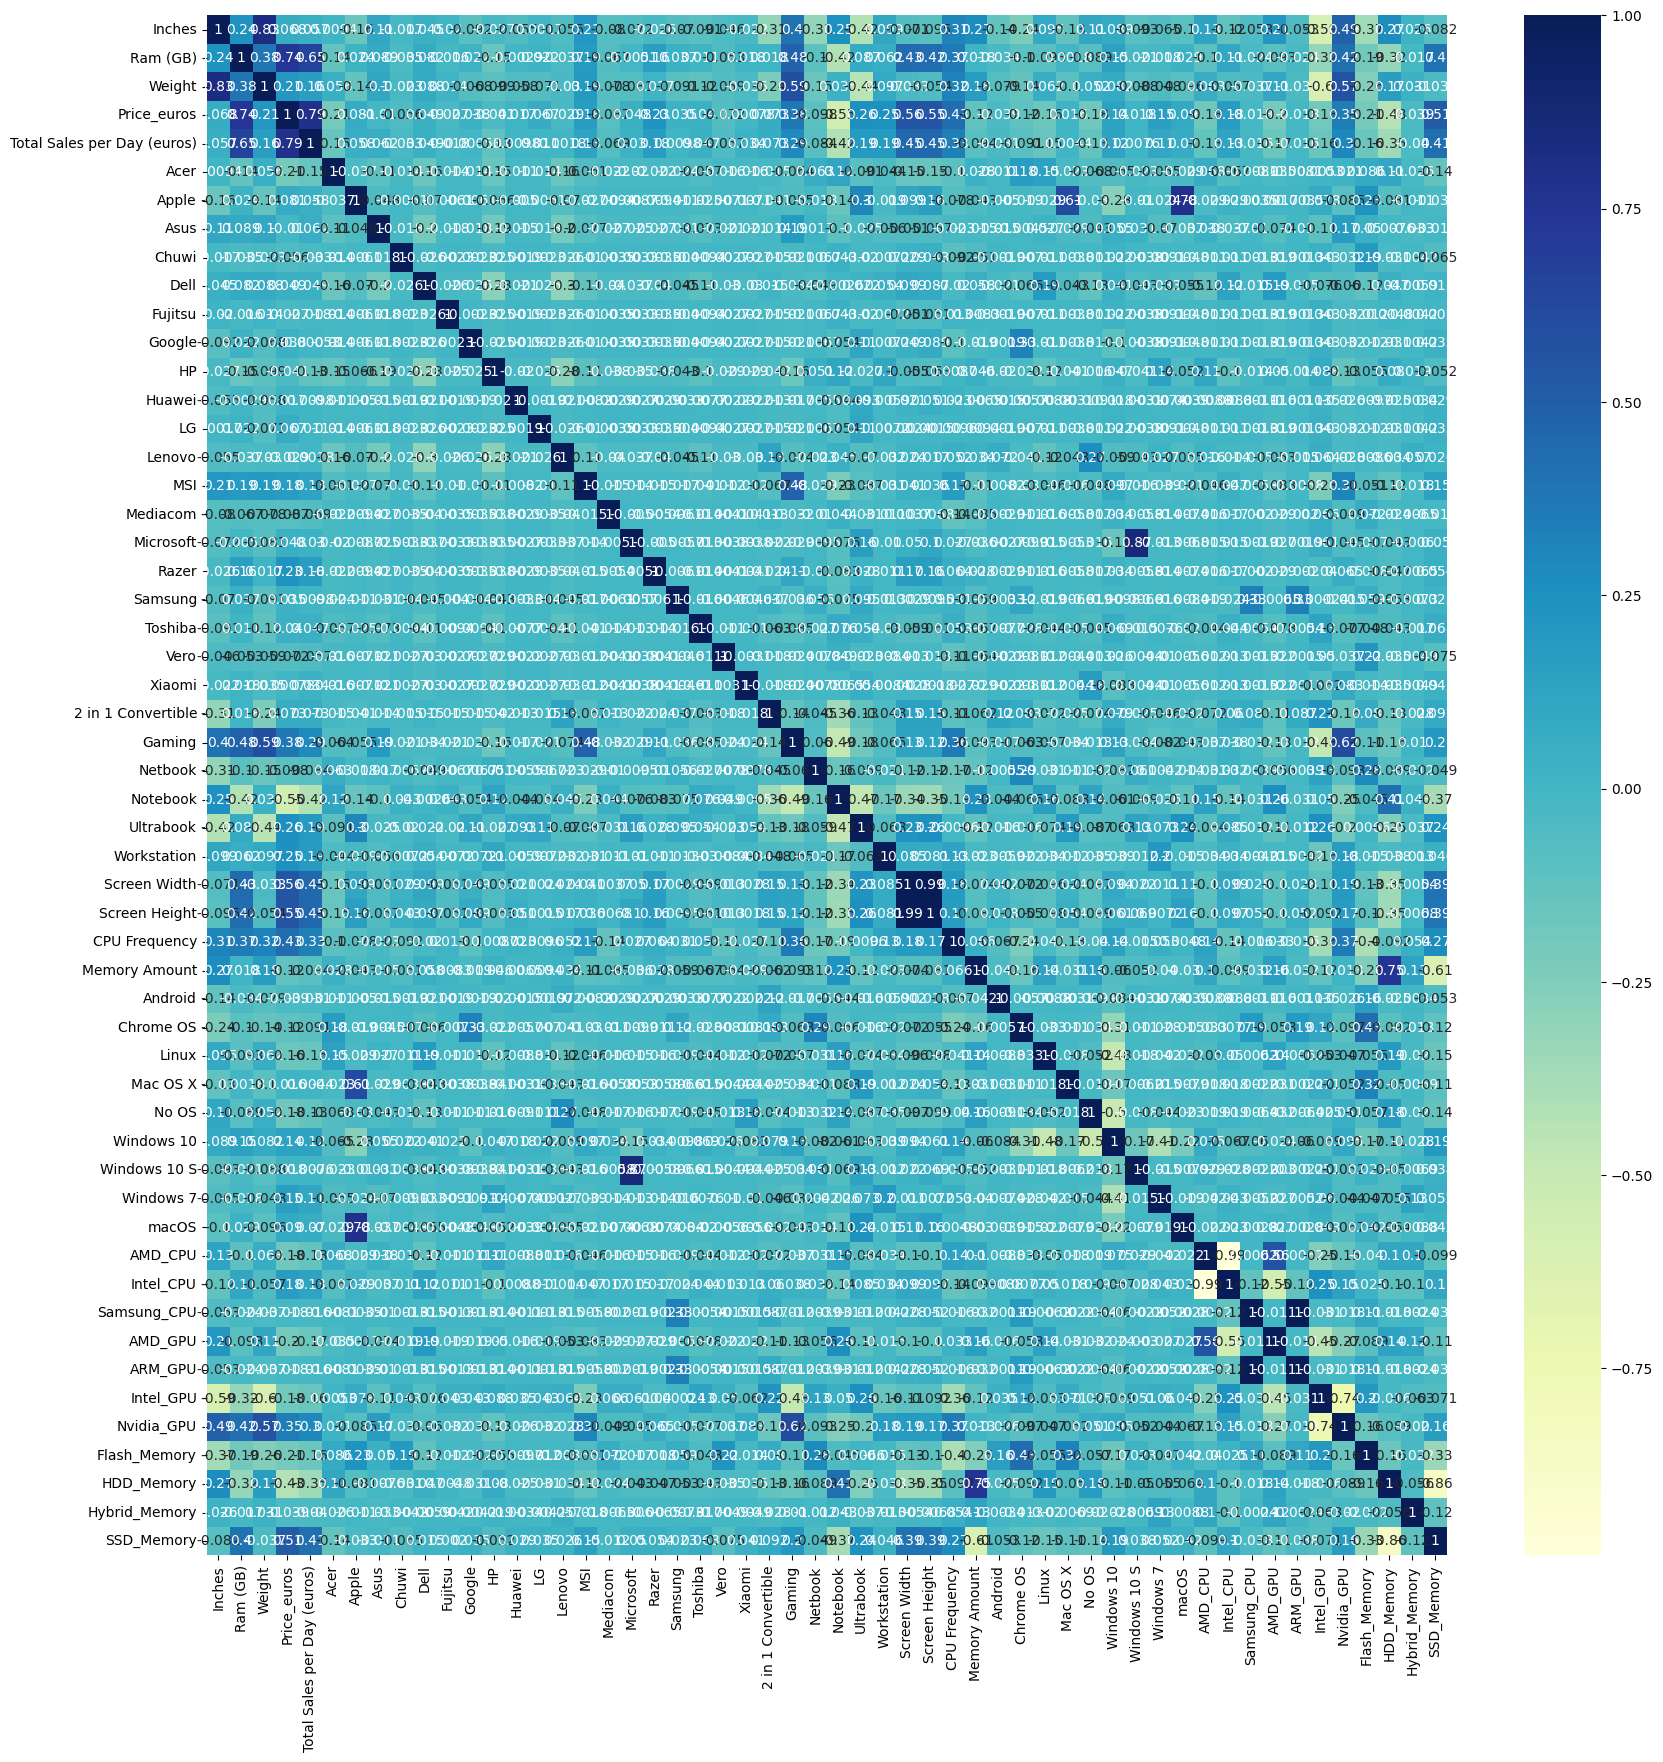

In [37]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [38]:
target_correlations = df.corr()['Total Sales per Day (euros)'].apply(abs).sort_values()

In [39]:
target_correlations

Google                         0.000534
Lenovo                         0.001763
Mac OS X                       0.004361
Windows 10 S                   0.007649
Samsung                        0.009804
Huawei                         0.009830
LG                             0.010628
ARM_GPU                        0.015784
Samsung_CPU                    0.015784
Fujitsu                        0.017875
Microsoft                      0.030208
Android                        0.031347
Chuwi                          0.033261
Xiaomi                         0.034079
Hybrid_Memory                  0.040367
Toshiba                        0.047250
Dell                           0.048930
Vero                           0.056649
Inches                         0.057162
Apple                          0.057738
Asus                           0.062265
Mediacom                       0.069360
macOS                          0.069728
2 in 1 Convertible             0.072858
Netbook                        0.083540


**MENGAMBIL 20 ATRIBUT KORELASI YANG MEMPUNYAI HASIL YANG TERBAIK**

In [41]:
selected_features = target_correlations[-20:].index
selected_features = list(selected_features)
selected_features

['Linux',
 'Acer',
 'Intel_GPU',
 'Flash_Memory',
 'Weight',
 'AMD_GPU',
 'Razer',
 'Ultrabook',
 'Workstation',
 'Gaming',
 'Nvidia_GPU',
 'CPU Frequency',
 'HDD_Memory',
 'SSD_Memory',
 'Notebook',
 'Screen Height',
 'Screen Width',
 'Ram (GB)',
 'Price_euros',
 'Total Sales per Day (euros)']

In [42]:
limited_df = df[selected_features]
limited_df

,Linux,Acer,Intel_GPU,Flash_Memory,Weight,AMD_GPU,Razer,Ultrabook,Workstation,Gaming,Nvidia_GPU,CPU Frequency,HDD_Memory,SSD_Memory,Notebook,Screen Height,Screen Width,Ram (GB),Price_euros,Total Sales per Day (euros)
0,0,0,1,0,1.37,0,0,1,0,0,0,2.3,0,1,0,1600,2560,8,1339.69,2679.38
1,0,0,1,1,1.34,0,0,1,0,0,0,1.8,0,0,0,900,1440,8,898.94,898.94
2,0,0,1,0,1.86,0,0,0,0,0,0,2.5,0,1,1,1080,1920,8,575.00,1150.00
3,0,0,0,0,1.83,1,0,1,0,0,0,2.7,0,1,0,1800,2880,16,2537.45,7612.35
4,0,0,1,0,1.37,0,0,1,0,0,0,3.1,0,1,0,1600,2560,8,1803.60,3607.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,0,1,0,1.80,0,0,0,0,0,0,2.5,0,1,0,1080,1920,4,638.00,1914.00
1299,0,0,1,0,1.30,0,0,0,0,0,0,2.5,0,1,0,1800,3200,16,1499.00,2998.00
1300,0,0,1,1,1.50,0,0,0,0,0,0,1.6,0,0,1,768,1366,2,229.00,458.00
1301,0,0,0,0,2.19,1,0,0,0,0,0,2.5,1,0,1,768,1366,6,764.00,764.00


<Axes: >

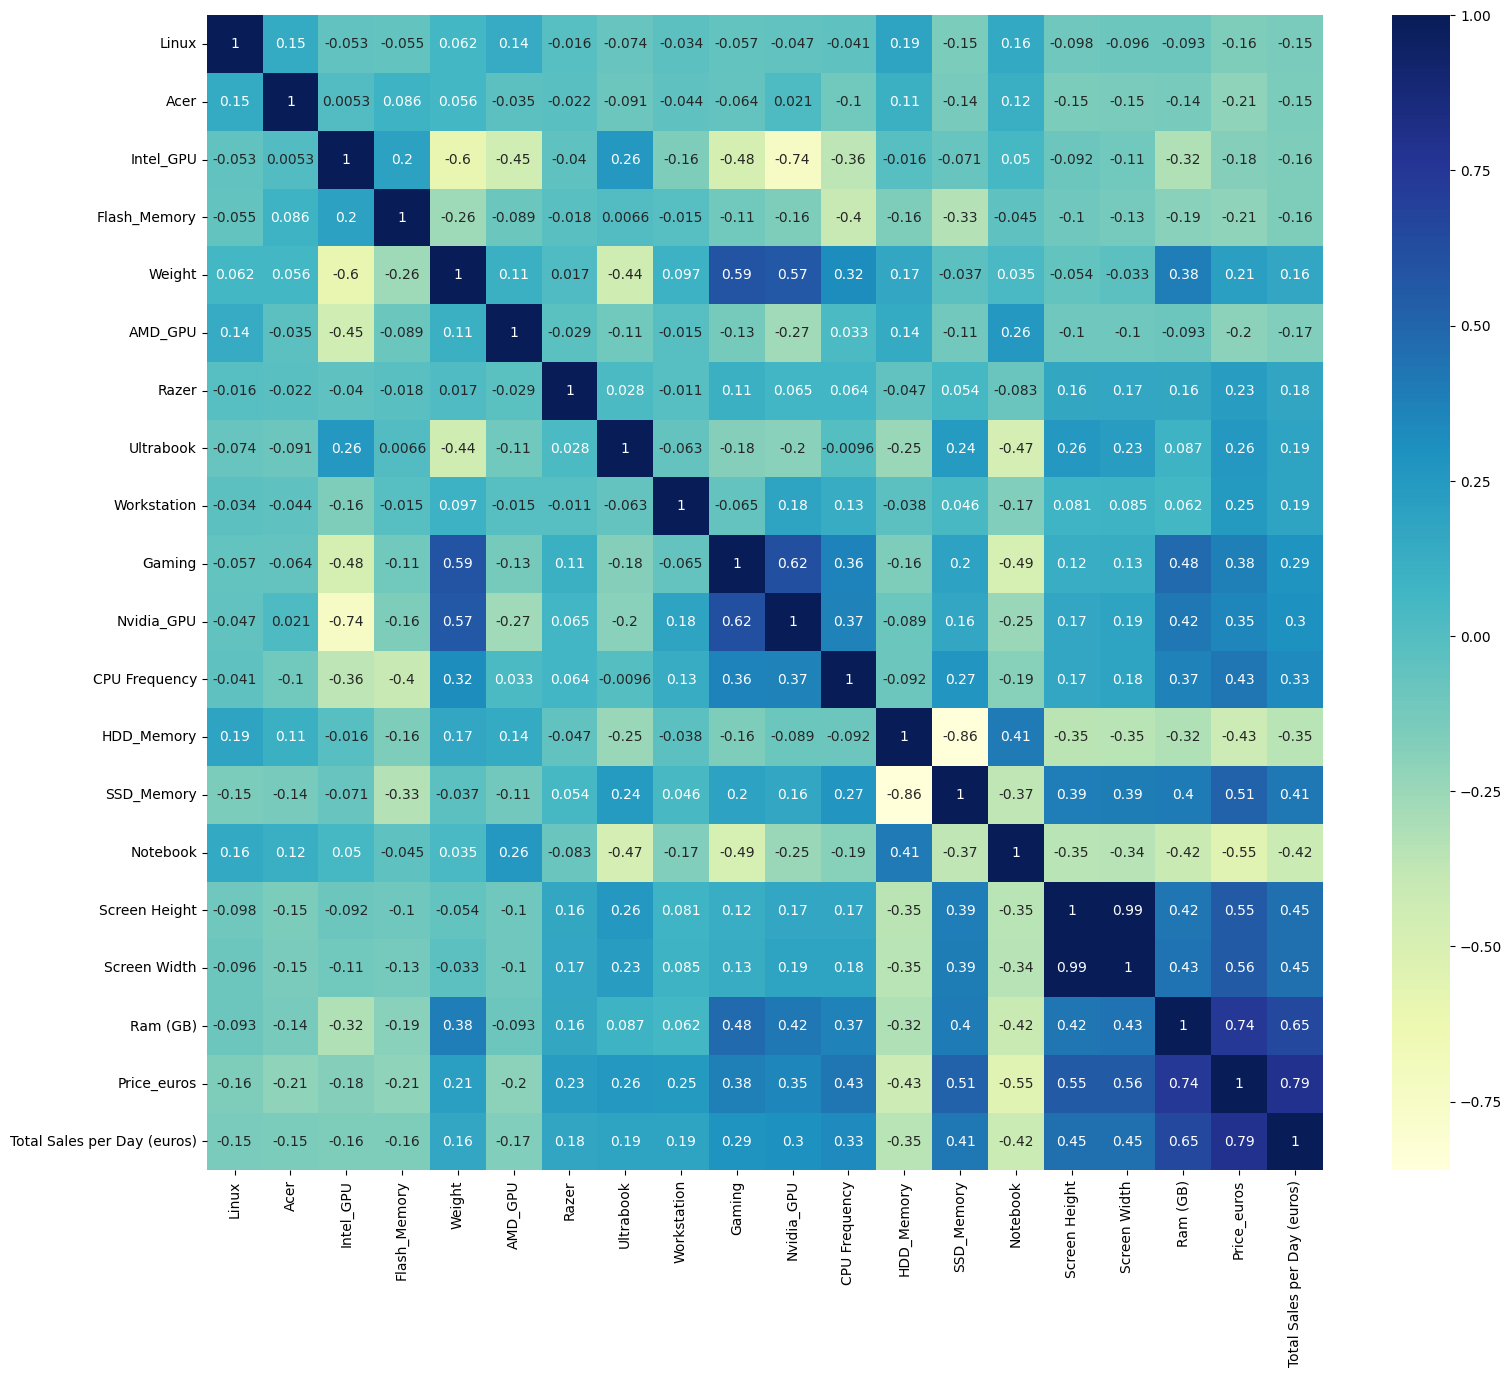

In [43]:
plt.figure(figsize=(18, 15))
sns.heatmap(limited_df.corr(), annot=True, cmap="YlGnBu")

**MENGHAPUS NILAI NAN ATAU KOSONG PADA ATRIBUT**

In [44]:
def null_count(df):
    return pd.DataFrame({'features': df.columns,
                'dtypes': df.dtypes.values,
                'NaN count': df.isnull().sum().values,
                'NaN percentage': df.isnull().sum().values/df.shape[0]}).style.background_gradient(cmap='jet',low=0.1,high=0.01)
null_count(df)

,features,dtypes,NaN count,NaN percentage
0,Inches,float64,0,0.000000
1,Ram (GB),int64,0,0.000000
2,Weight,float64,0,0.000000
3,Price_euros,float64,0,0.000000
4,Total Sales per Day (euros),float64,0,0.000000
5,Acer,int64,0,0.000000
6,Apple,int64,0,0.000000
7,Asus,int64,0,0.000000
8,Chuwi,int64,0,0.000000
9,Dell,int64,0,0.000000


In [45]:
df.iloc[:, :].describe().T.sort_values(by='std', ascending=False) \
    .style.background_gradient(cmap='GnBu') \
    .bar(subset=["max"], color='#BB0000') \
    .bar(subset=["mean"], color='green')

,count,mean,std,min,25%,50%,75%,max
Memory Amount,1303.000000,442615.502686,356225.802118,8000.000000,256000.000000,256000.000000,512000.000000,2000000.000000
Total Sales per Day (euros),1303.000000,2432.426048,1957.498774,224.000000,1138.000000,1900.000000,3158.000000,19875.000000
Price_euros,1303.000000,1123.686992,699.009043,174.000000,599.000000,977.000000,1487.880000,6099.000000
Screen Width,1303.000000,1894.784344,494.641028,1366.000000,1600.000000,1920.000000,1920.000000,3840.000000
Screen Height,1303.000000,1070.830391,284.519410,768.000000,900.000000,1080.000000,1080.000000,2160.000000
Ram (GB),1303.000000,8.382195,5.084665,2.000000,4.000000,8.000000,8.000000,64.000000
Inches,1303.000000,15.017191,1.426304,10.100000,14.000000,15.600000,15.600000,18.400000
Weight,1303.000000,2.038734,0.665475,0.690000,1.500000,2.040000,2.300000,4.700000
CPU Frequency,1303.000000,2.298772,0.506340,0.900000,2.000000,2.500000,2.700000,3.600000
Intel_GPU,1303.000000,0.554106,0.497255,0.000000,0.000000,1.000000,1.000000,1.000000


<Axes: >

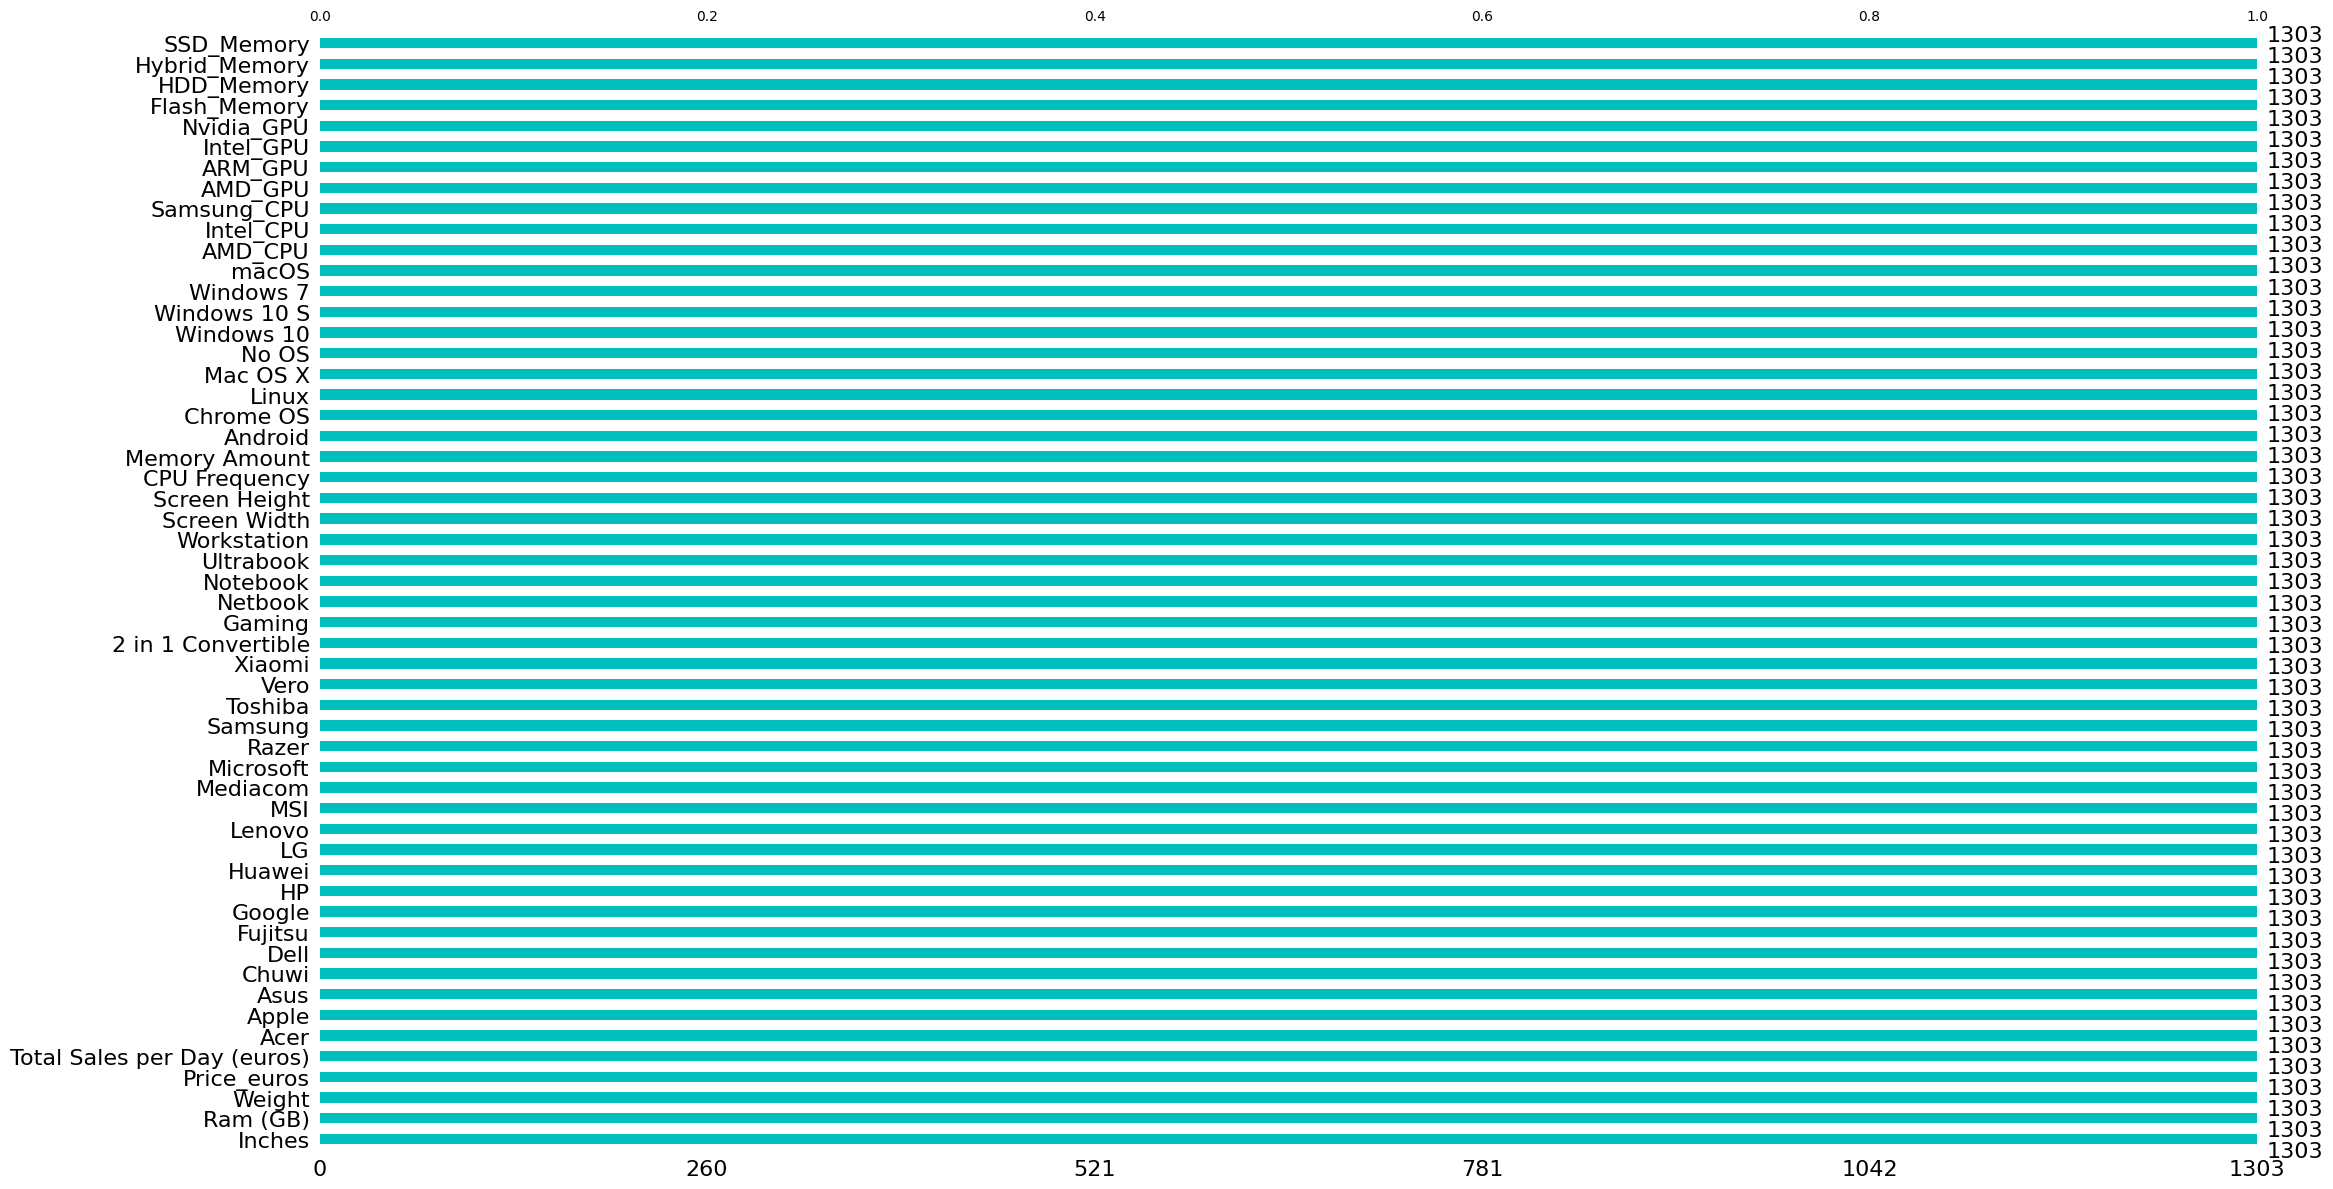

In [46]:
msno.bar(df, color = 'c')

In [47]:
print("Number of duplicates: " + str(df.duplicated().sum()))

Number of duplicates: 8


In [48]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Inches: 18 distinct values
Ram (GB): 9 distinct values
Weight: 171 distinct values
Price_euros: 791 distinct values
Total Sales per Day (euros): 993 distinct values
Acer: 2 distinct values
Apple: 2 distinct values
Asus: 2 distinct values
Chuwi: 2 distinct values
Dell: 2 distinct values
Fujitsu: 2 distinct values
Google: 2 distinct values
HP: 2 distinct values
Huawei: 2 distinct values
LG: 2 distinct values
Lenovo: 2 distinct values
MSI: 2 distinct values
Mediacom: 2 distinct values
Microsoft: 2 distinct values
Razer: 2 distinct values
Samsung: 2 distinct values
Toshiba: 2 distinct values
Vero: 2 distinct values
Xiaomi: 2 distinct values
2 in 1 Convertible: 2 distinct values
Gaming: 2 distinct values
Netbook: 2 distinct values
Notebook: 2 distinct values
Ultrabook: 2 distinct values
Workstation: 2 distinct values
Screen Width: 13 distinct values
Screen Height: 10 distinct values
CPU Frequency: 25 distinct values
Memory Amount: 13 distinct values
Android: 2 distinct values
Chrome OS: 2 d

In [49]:
def clean_data(df):
    # Convert 'Total Sales per Day (euros)' column to numeric, handling non-numeric values
    df['Total Sales per Day (euros)'] = pd.to_numeric(df['Total Sales per Day (euros)'], errors='coerce')

    # Example: Fill missing values in 'Total Sales per Day (euros)' with the mean
    df['Total Sales per Day (euros)'].fillna(df['Total Sales per Day (euros)'].mean(), inplace=True)

    return df

df_clean = clean_data(df.copy())

In [50]:
df1 = df_clean.copy()

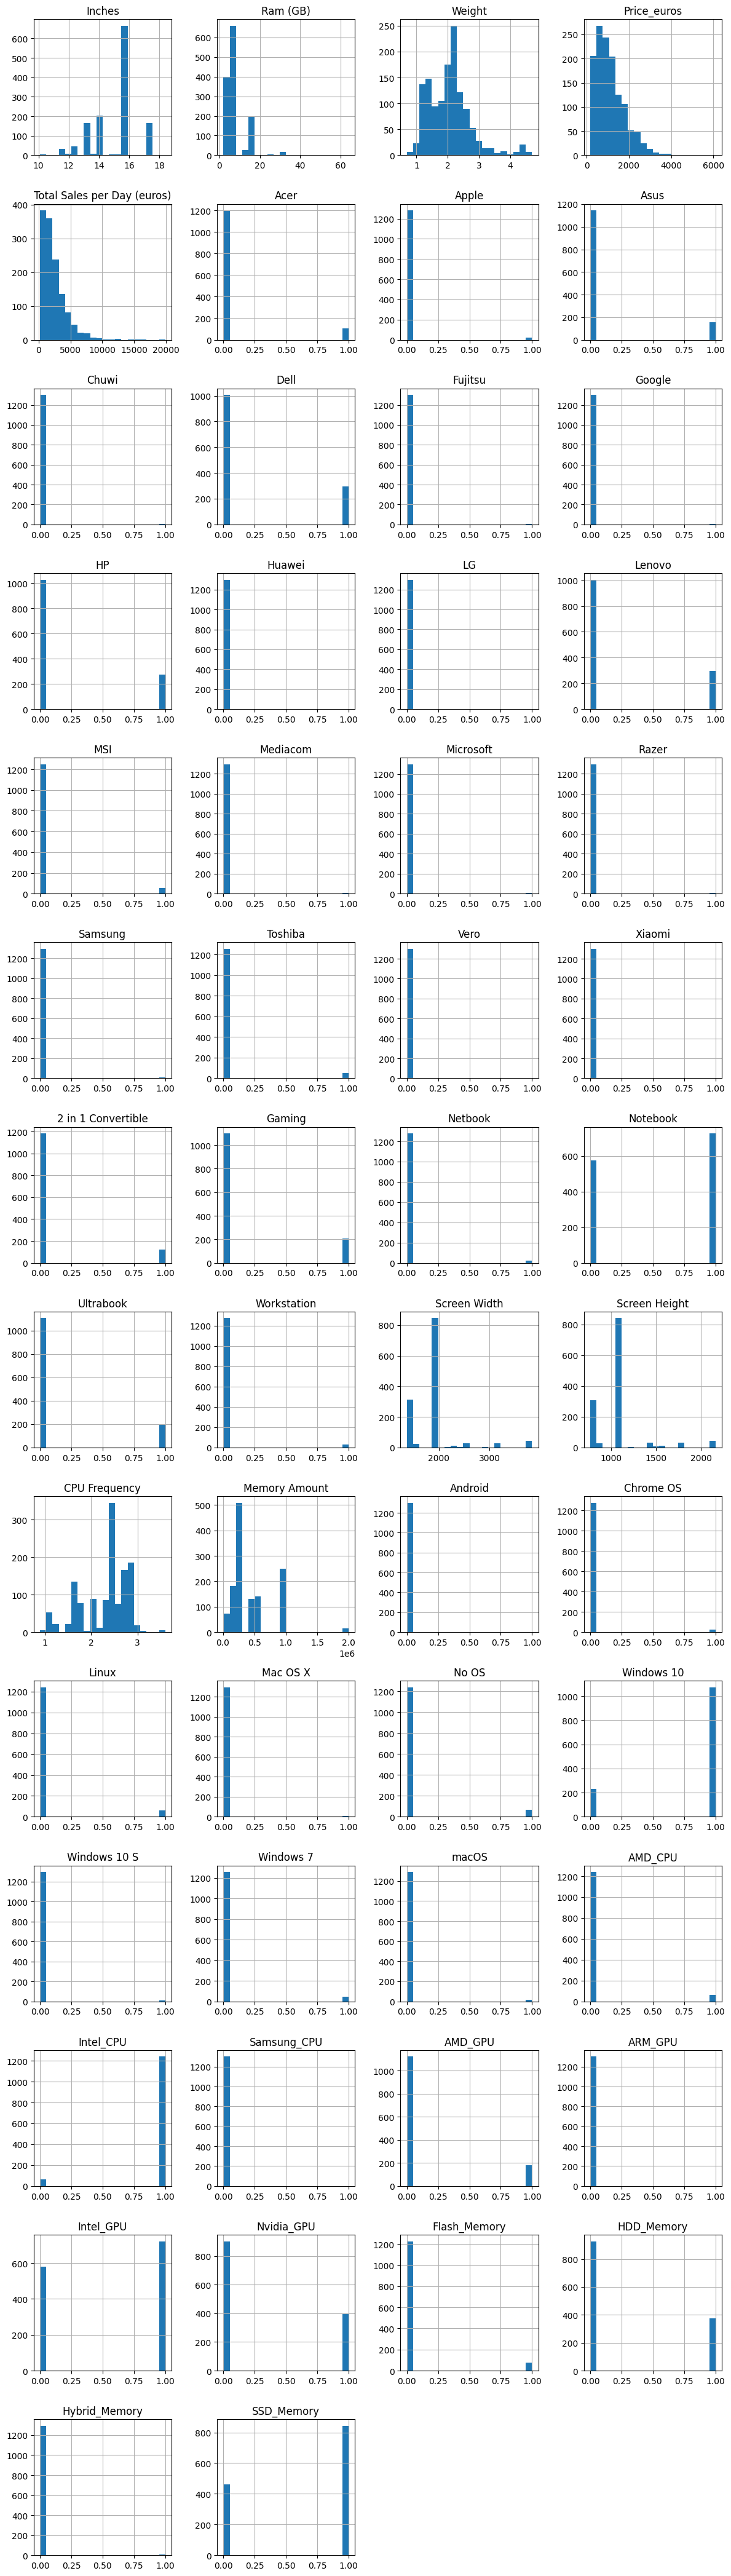

In [51]:
# Calculate the number of rows and columns needed
num_cols = df1.shape[1]
nrows = (num_cols + 3) // 4  # Calculate rows, ensuring enough space
ncols = 4  # Fixed number of columns

# Plot the histograms with the adjusted layout
df1.hist(layout=(nrows, ncols), bins=20, figsize=(12, nrows * 3))  # Adjust figsize for better visualization
plt.tight_layout()
plt.show()

**MEMBAGI DATA TRAIN DAN TEST MENJADI 80/20**

In [52]:
X, y = limited_df.drop("Total Sales per Day (euros)", axis=1), limited_df["Total Sales per Day (euros)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

In [54]:
X_scaled_df = pd.DataFrame(X_scaled)

X_scaled_df.describe().T.style.background_gradient(axis=0, cmap='Set2')

,count,mean,std,min,25%,50%,75%,max
0,1303.000000,0.000000,1.000384,-0.223517,-0.223517,-0.223517,-0.223517,4.473939
1,1303.000000,-0.000000,1.000384,-0.292973,-0.292973,-0.292973,-0.292973,3.413281
2,1303.000000,-0.000000,1.000384,-1.114758,-1.114758,0.897056,0.897056,0.897056
3,1303.000000,-0.000000,1.000384,-0.247133,-0.247133,-0.247133,-0.247133,4.046398
4,1303.000000,-0.000000,1.000384,-2.027503,-0.809859,0.001904,0.392752,4.000586
5,1303.000000,-0.000000,1.000384,-0.400356,-0.400356,-0.400356,-0.400356,2.497777
6,1303.000000,-0.000000,1.000384,-0.073493,-0.073493,-0.073493,-0.073493,13.606721
7,1303.000000,-0.000000,1.000384,-0.420779,-0.420779,-0.420779,-0.420779,2.376544
8,1303.000000,0.000000,1.000384,-0.150874,-0.150874,-0.150874,-0.150874,6.628049
9,1303.000000,0.000000,1.000384,-0.432092,-0.432092,-0.432092,-0.432092,2.314324


In [55]:
decom = PCA(svd_solver='auto')
X_pca = decom.fit_transform(X_scaled)

In [56]:
ex_var = np.cumsum(np.round(decom.explained_variance_ratio_, 2) * 100)

<Axes: >

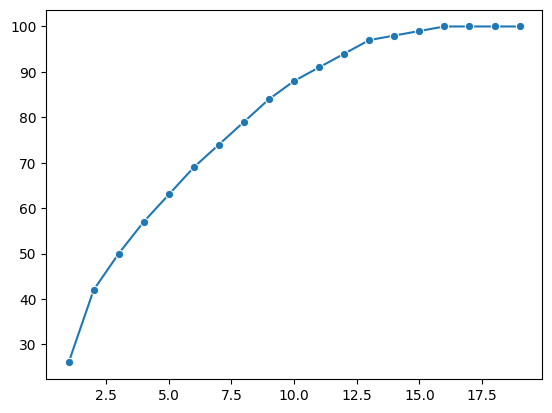

In [57]:
sns.lineplot(y=ex_var, x=np.arange(1, len(ex_var) + 1), marker='o')

**MEMBUAT MODEL ALGORITMA LINEAR REGRESION & RANDOM FOREST**

In [59]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)

In [60]:
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)
y_pred_forest = random_forest_reg.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred_forest)

**HASIL METODE LINEAR REGRESI DAN RANDOM FOREST**

In [62]:
results_df3['R-squared'] = [
    r2_score(y_test, y_pred_linear),
    r2_score(y_test, y_pred_forest)
]

print(results_df3)

                   Mean Squared Error  R-squared
Linear Regression        1.636497e+06   0.627000
Random Forest            2.110024e+06   0.519071


** Pengoptimalan parameter hyperparameter secara otomatist Menggunakan Optuna**

In [64]:
!pip install optuna
import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.5 MB/s eta 0:00:00


In [65]:
optuna.logging.disable_default_handler() # Disable Optuna's default logging

In [66]:
def objective(trial):
    alpha = trial.suggest_loguniform('alpha', 0.1, 100)
    linear_model =  LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred = linear_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

<ipython-input-66-c5bed4075cff>:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 0.1, 100)
<ipython-input-66-c5bed4075cff>:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 0.1, 100)
<ipython-input-66-c5bed4075cff>:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 0.1, 100)
<ipython-input-66-c5bed4075cff>:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will 

In [67]:
optuna.logging.enable_default_handler()

In [68]:
best_alpha_optuna = study.best_params['alpha']
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_best = linear_reg.predict(X_test)
mse_best_model = mean_squared_error(y_test, y_pred_best)

print(f'Mean Squared Error for the Best Linear Regression Model: {mse_best_model}')
print(f'Number of finished trials: {len(study.trials)}')
print(f'Best trial:\n{study.best_trial}')

Mean Squared Error for the Best Linear Regression Model: 1636497.1471763598
Number of finished trials: 100
Best trial:
FrozenTrial(number=0, state=TrialState.COMPLETE, values=[1636497.1471763598], datetime_start=datetime.datetime(2024, 7, 26, 5, 19, 31, 697294), datetime_complete=datetime.datetime(2024, 7, 26, 5, 19, 31, 735750), params={'alpha': 10.60541135815537}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'alpha': FloatDistribution(high=100.0, log=True, low=0.1, step=None)}, trial_id=0, value=None)


In [72]:
result_df = pd.DataFrame(X_test)  # Mulai dengan fitur yang digunakan
result_df['Actual'] = y_test
result_df['Predicted'] = y_pred_best

# Tampilkan hasil dalam bentuk tabel
display(result_df.head(10))

,Linux,Acer,Intel_GPU,Flash_Memory,Weight,AMD_GPU,Razer,Ultrabook,Workstation,Gaming,...,CPU Frequency,HDD_Memory,SSD_Memory,Notebook,Screen Height,Screen Width,Ram (GB),Price_euros,Actual,Predicted
665,0,0,1,0,2.10,0,0,0,0,0,...,2.1,0,1,1,768,1366,4,498.00,1494.00,977.743542
869,0,0,0,0,2.23,0,0,0,1,0,...,2.8,1,0,0,1080,1920,8,1778.00,3556.00,3800.475735
313,0,1,0,0,2.23,1,0,0,0,0,...,2.2,0,1,1,1080,1920,8,469.00,1876.00,1321.915094
761,0,0,1,0,1.18,0,0,1,0,0,...,2.8,0,1,0,1080,1920,16,1859.00,3718.00,4368.678938
124,0,1,0,0,2.10,1,0,0,0,0,...,3.0,0,1,1,768,1366,4,451.00,1353.00,947.303390
679,0,1,0,0,2.50,0,0,0,0,1,...,2.5,0,1,0,1080,1920,16,1299.00,1299.00,3330.878840
839,0,0,1,0,2.30,0,0,0,0,0,...,2.5,1,0,1,1080,1920,8,590.00,1180.00,1424.072237
1153,0,0,0,0,2.62,0,0,0,0,1,...,2.8,1,0,0,1080,1920,8,1199.00,1199.00,2365.559914
1251,0,0,0,0,1.86,1,0,0,0,0,...,2.5,1,0,1,768,1366,4,399.00,798.00,761.966727
272,1,0,0,0,2.14,1,0,0,0,0,...,1.8,0,1,1,1080,1920,8,735.07,1470.14,1490.545971


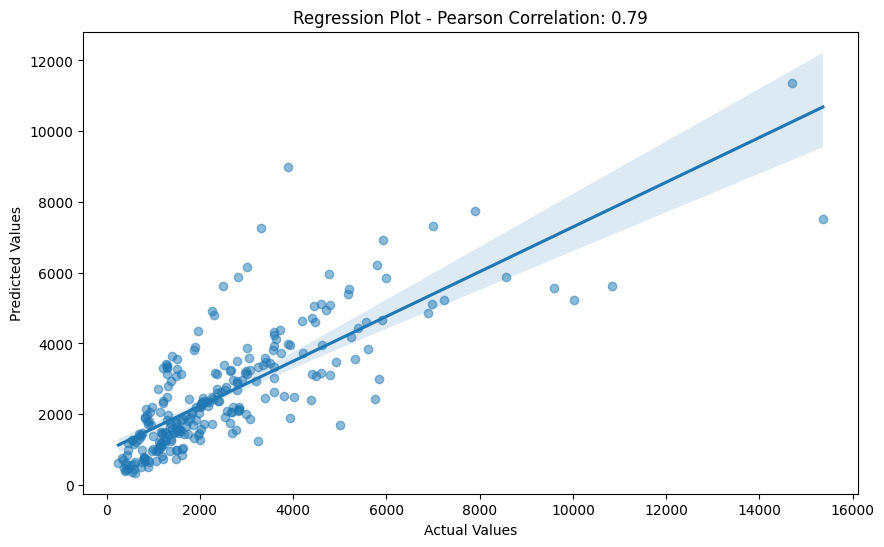

In [73]:
correlation, _ = pearsonr(y_test, y_pred_best)

plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_best, scatter_kws={'alpha': 0.5})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Regression Plot - Pearson Correlation: {correlation:.2f}')
plt.show()

**PENGUJIAN EVALUASI MODEL RANDOM FOREST MENGGUNAKAN FEATURE IMPORTANCE**

Feature Importance:
          Feature  Importance
18    Price_euros    0.755346
4          Weight    0.088669
11  CPU Frequency    0.046910
17       Ram (GB)    0.040729
14       Notebook    0.009823
15  Screen Height    0.008907
16   Screen Width    0.008663
9          Gaming    0.006424
6           Razer    0.005251
7       Ultrabook    0.004752
10     Nvidia_GPU    0.004510
2       Intel_GPU    0.004188
13     SSD_Memory    0.003602
5         AMD_GPU    0.003185
8     Workstation    0.002794
1            Acer    0.002050
12     HDD_Memory    0.001953
3    Flash_Memory    0.001145
0           Linux    0.001099


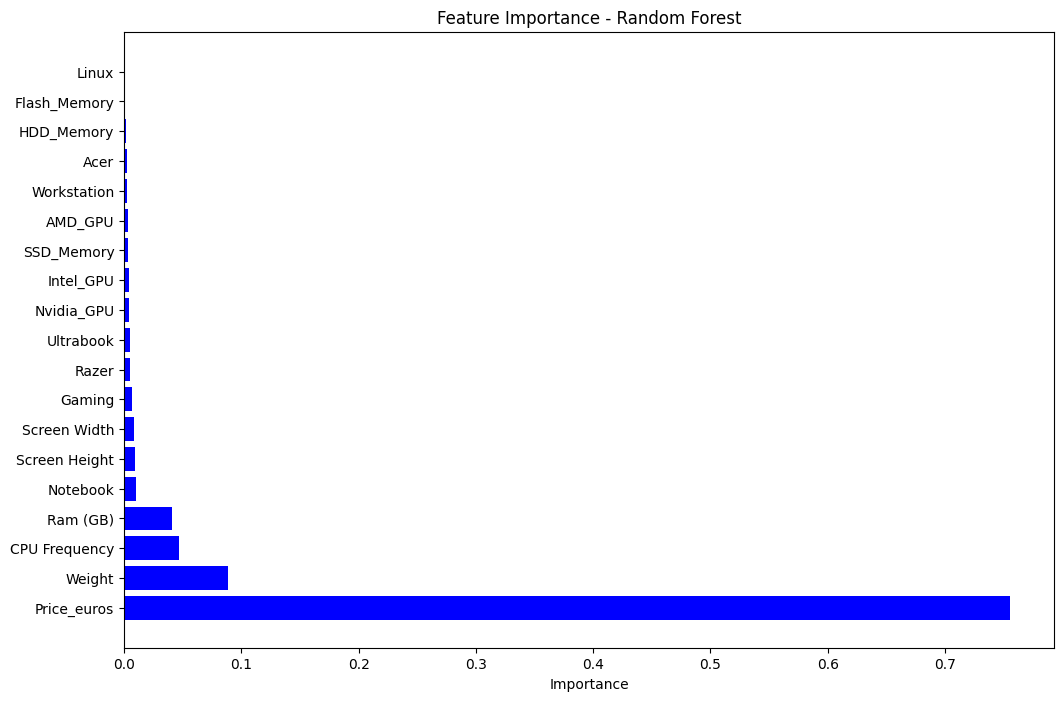

In [74]:
importances = random_forest_reg.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)


plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue')
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()

**HARGA ASLI : 1470**

In [81]:
y_test.iloc[9]

1470.14

**HASIL HARGA PREDIKSI MENGGUNAKAN LINEAR REGRESSION: 1490**

In [82]:
linear_reg.predict(X_test)[9]

1490.5459710313023

**HASIL HARGA PREDIKSI MENGGUNAKAN RANDOM FOREST: 1914**

In [83]:
random_forest_reg.predict(X_test)[9]

1914.3213833333336



---



**MENGUNDUH FILE MENGGUNAKAN FORMAS xlsx**

In [78]:
# Simpan ke file CSV
df.to_csv('Normalisasi Laptop Sales Per Day.csv', index=False)

# Simpan ke file XLSX
df.to_excel('Normalisasi Laptop Sales Per Day.xlsx', index=False)


In [79]:
# Download file CSV
files.download('Normalisasi Laptop Sales Per Day.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>